In [551]:
import numpy as np
import time

In [552]:
# f = open('8nodes(5)', 'w')
# f.write('9\n')
# f.write('0 0\n')

# for i in range(8):
#     x = np.random.randint(1, 17)
#     y = np.random.randint(1, 17)
#     f.write('{} {}\n'.format(x, y))

# f.close()

In [553]:
def load_data(path = "8nodes(5)"):
    with open(path, 'r') as f:
        inputData = f.readlines()
    
    N = int(inputData[0].strip())
    node_list=[]
    for node in inputData[1:]:
        #del '\n' 
        node = node.strip()
        #split by ' '
        node = node.split(' ')
        node_list.append((int(node[0]), int(node[1])))

    return node_list, N

node_list, num_nodes = load_data()

In [554]:
def DistanceMatrix(cities, n):
    dis_matrix = np.zeros([n,n])
    min_dis = np.full((n, 2), np.inf)
    adv0 = []
    for i in range(n):
        for j in range(i+1, n):
            a = np.array(cities[i])
            b = np.array(cities[j])
            c = a - b
            dis_matrix[i, j] = np.sqrt(np.sum(c*c))
            if dis_matrix[i, j] < min_dis[i, 1]:
              min_dis[i, 0] = j
              min_dis[i, 1] = dis_matrix[i, j]
            dis_matrix[j, i] = dis_matrix[i, j]
            if dis_matrix[j, i] < min_dis[j, 1] and i != 0:
              min_dis[j, 0] = i
              min_dis[j, 1] = dis_matrix[i, j]
            if i == 0: adv0.append((dis_matrix[i, j], j))
    
    adv0.sort(key=lambda tup: tup[0], reverse = False)

    return np.around(dis_matrix), np.around(min_dis), adv0

dis_matrix, min_dis, adv0 = DistanceMatrix(node_list, num_nodes)

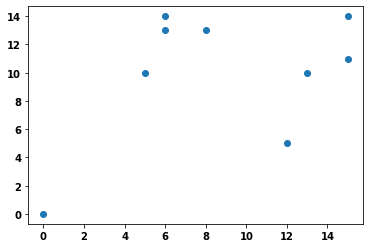

In [555]:
import matplotlib.pyplot as plt

points = np.array(node_list)

plt.scatter(points[:, 0], points[:, 1])

In [200]:
#Branch and bound

cmin = 1e9
for i in dis_matrix.flatten():
    if i != 0.0:
        cmin = min(cmin, i)

mark = [0 for i in range(100)]
res = 1e9
curr_dis = 0
path = [0 for i in range(100)]

def TRY(k):
    global curr_dis
    global res
    
    for i in range(1, num_nodes):
        if mark[i] == 0:
            mark[i] = 1
            curr_dis = curr_dis + dis_matrix[path[k-1]][i]
            path[k] = i

            if curr_dis + cmin*(num_nodes-k) > res:
                mark[i] = 0
                curr_dis = curr_dis - dis_matrix[path[k-1]][i]
                continue

            if k + 1 == num_nodes:
                res = min(res, curr_dis+dis_matrix[i][0])
            else:
                TRY(k+1)

            mark[i] = 0
            curr_dis = curr_dis - dis_matrix[path[k-1]][i]
            
s = time.time()
TRY(1)
e = time.time()
print(res)
print(e-s)

53.0
0.0588223934173584


In [243]:
#Branch and bound

cmin = 1e9
for i in dis_matrix.flatten():
    if i != 0.0:
        cmin = min(cmin, i)

mark = [0 for i in range(100)]
path = [0 for i in range(100)]

def TRY(k, res, curr_dis):
    for i in range(1, num_nodes):
        if mark[i] == 0:
            mark[i] = 1
            curr_dis = curr_dis + dis_matrix[path[k-1]][i]
            path[k] = i

            if curr_dis + cmin*(num_nodes-k) > res:
                mark[i] = 0
                curr_dis = curr_dis - dis_matrix[path[k-1]][i]
                continue

            if k + 1 == num_nodes:
                res = min(res, curr_dis+dis_matrix[i][0])
            else:
                res = TRY(k+1, res, curr_dis)

            mark[i] = 0
            curr_dis = curr_dis - dis_matrix[path[k-1]][i]

    return res
            
s = time.time()
res = TRY(1, res=1e9, curr_dis=0)
e = time.time()
print(res)
print(e-s)

49.0
0.04318523406982422
